In [6]:

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip



Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (167 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [0]:
import numpy as np
import pandas as pd
import glob
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch
import json

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from google.colab import files
uploaded = files.upload()

Saving City_stat_lat_long_simpleletters.csv to City_stat_lat_long_simpleletters.csv


In [36]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['City_stat_lat_long_simpleletters.csv'].decode('utf-8')))
print(df)

    Unnamed: 0  death  infected  ...  country        lat        lng
0            0      1        41  ...      swe  56.166667  15.583333
1            1     36       313  ...      swe  60.600000  15.633333
2            2     27       263  ...      swe  60.666667  17.166667
3            3      0        16  ...      swe  57.639617  18.298582
4            4     15       180  ...      swe  56.671389  12.855556
5            5      0       123  ...      swe  63.183333  14.650000
6            6     24       336  ...      swe  57.783333  14.183333
7            7      4        65  ...      swe  56.666667  16.366667
8            8      1        87  ...      swe  56.883333  14.816667
9            9      7       133  ...      swe  65.583333  22.150000
10          10      5       308  ...      swe  59.283333  15.216667
11          11     32       942  ...      swe  58.416667  15.616667
12          12     21       429  ...      swe  55.600000  13.000000
13          13     83       639  ...      swe  5

In [55]:
# Defining the x, y and z of datasets
lons=np.array(df['lng']) 
lats=np.array(df['lat']) 
data=np.array(df['death'])


21


In [0]:
# Defining define the grid points where we seek the interpolated values
# Grid_space is the desired delta/step of the output array 
grid_space = 0.01
grid_lon = np.arange(np.amin(lons), np.amax(lons), grid_space)
grid_lat = np.arange(np.amin(lats), np.amax(lats), grid_space)

In [66]:
# Using "Ordinary Kriging” function of “PyKrige” package to interpolate our data at the defined grid points
OK = OrdinaryKriging(lons, lats, data, variogram_model='gaussian', verbose=True, enable_plotting=False,nlags=20)
z1, ss1 = OK.execute('grid', grid_lon, grid_lat)

print(len(z1))
if z1.any==0:
  print("h3llo")
print(z1==0)

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'exponential' Variogram Model
Partial Sill: 395.4794936622336
Full Sill: 457.00304766137725
Range: 0.19459901660886209
Nugget: 61.52355399914362 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



NameError: ignored

In [68]:
def zero_surrounded(array):
    return not (array[0,:].any() or array[-1,:].any() or array[:,0].any() or array[:,-1].any())


print(zero_surrounded(z1))

surrounded = np.sum(z1[1:-1, 1:-1]**2) == np.sum(z1**2)
print(surrounded)  

False
False


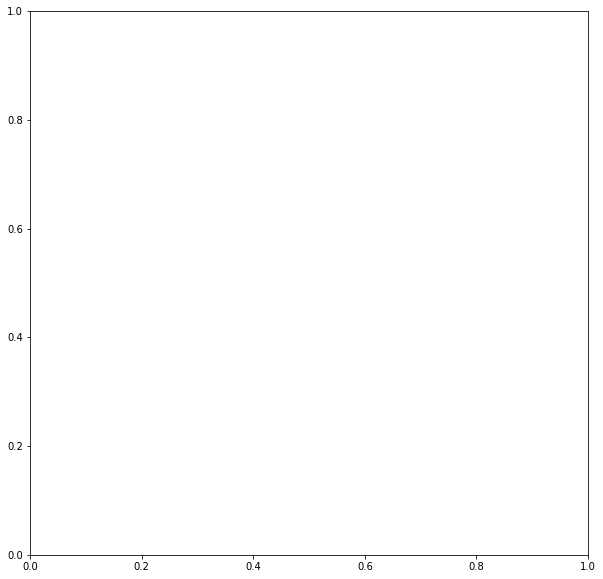

In [63]:
# Plot the interpolated values. 
# We will use the “basemap” module to plot the geographic data.
xintrp, yintrp = np.meshgrid(grid_lon, grid_lat)
fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(llcrnrlon=lons.min()-0.1,llcrnrlat=lats.min()-0.1,urcrnrlon=lons.max()+0.1,urcrnrlat=lats.max()+0.1, projection='merc', resolution='h',area_thresh=1000.,ax=ax)

KeyError: ignored

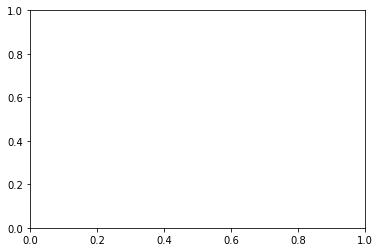

In [69]:
m.drawcoastlines() #draw coastlines on the map
x,y=m(xintrp, yintrp) # convert the coordinates into the map scales
ln,lt=m(lons,lats)
cs=ax.contour(x, y, z1) #plot the data on the map.
cbar=m.colorbar(cs,location='right',pad="7%") #plot the colorbar on the map
# draw parallels.
parallels = np.arange(21.5,26.0,0.5)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=14, linewidth=0.0) #Draw the latitude labels on the map
 
# draw meridians
meridians = np.arange(119.5,122.5,0.5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=14, linewidth=0.0)
